Cleaned out NaN values, made data more useable, and created some charts.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv("./data/clean_data.csv").dropna(subset=['Area Name', 'Annual median wage(2)', '2022-05-31', 'Employment per 1,000 jobs'])
df = df.drop(132)

df['Annual median wage(2)'] = df['Annual median wage(2)'].astype(float)
df['Rent over income'] = df['2022-05-31']/(df['Annual median wage(2)']/12)

Area Name
Kokomo, IN(0029020)                                   0.073131
Carbondale-Marion, IL(0016060)                        0.081314
Springfield, OH(0044220)                              0.087852
Wausau, WI(0048140)                                   0.092248
Johnstown, PA(0027780)                                0.098281
                                                        ...   
Santa Fe, NM(0042140)                                 0.278921
Santa Maria-Santa Barbara, CA(0042200)                0.291540
Miami-Fort Lauderdale-West Palm Beach, FL(0033100)    0.293452
Kahului-Wailuku-Lahaina, HI(0027980)                  0.300784
Naples-Immokalee-Marco Island, FL(0034940)            0.391731
Name: Rent over income, Length: 321, dtype: float64


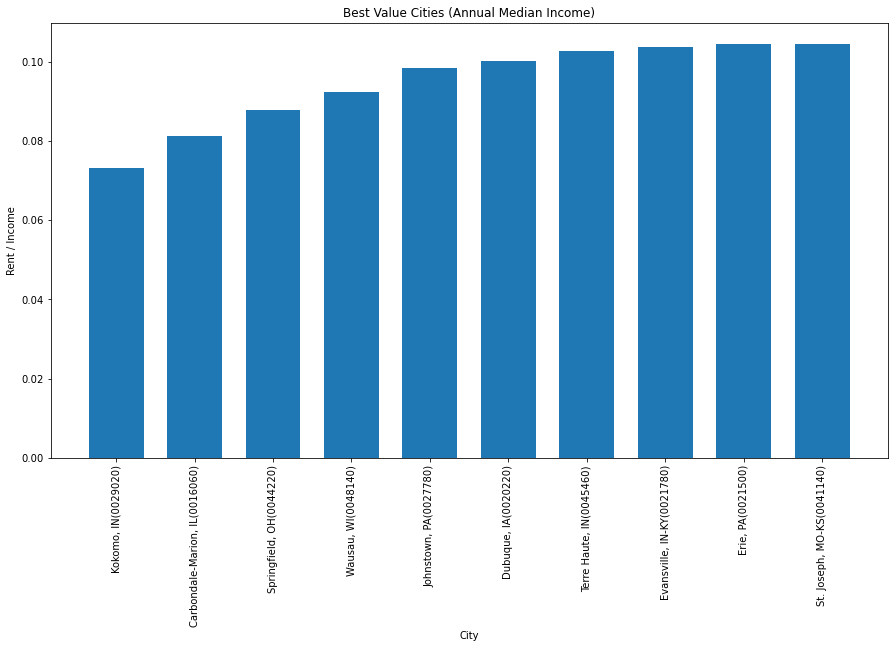

In [43]:
# Best Value (Annual Median)
areas = df.sort_values('Rent over income')['Area Name'].tolist()
rentPerc = df.sort_values('Rent over income')['Rent over income'].tolist()

print(df.groupby(['Area Name'])['Rent over income'].mean().sort_values())

plt.figure(figsize=(15, 8))
plt.xlabel('City')
plt.ylabel('Rent / Income')
plt.title('Best Value Cities (Annual Median Income)')
plt.xticks(range(len(areas[:10])), areas[:10], rotation='vertical')
gr = plt.bar(areas[:10], rentPerc[:10], width=0.7)

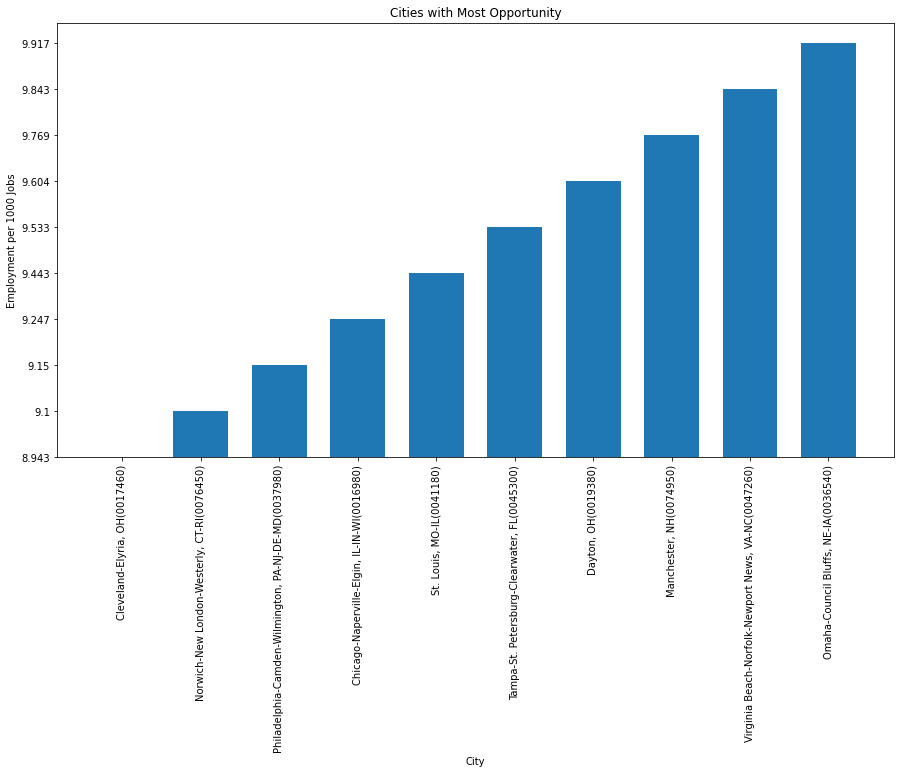

In [35]:
# Cities with most job opportunities
areas = df.sort_values('Employment per 1,000 jobs')['Area Name'].tolist()
jobOp = df.sort_values('Employment per 1,000 jobs')['Employment per 1,000 jobs'].tolist()

plt.figure(figsize=(15, 8))
plt.xlabel('City')
plt.ylabel('Employment per 1000 Jobs')
plt.title('Cities with Most Opportunity')
plt.xticks(range(len(areas[-10:])), areas[-10:], rotation='vertical')
gr = plt.bar(areas[-10:], jobOp[-10:], width=0.7)